In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Input, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
from tensorflow.keras.models import Model

from tensorflow.keras.layers import Dense, Flatten, Input, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os

import matplotlib.pyplot as plt
import cv2
import numpy as np
from glob import glob
import seaborn as sns
import pickle

from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import TimeDistributed
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalMaxPooling2D
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.layers import Embedding, BatchNormalization
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import VGG19

import sklearn.metrics as metrics
from sklearn.metrics import f1_score, precision_score, recall_score

In [ ]:
IMAGE_SIZE = [224,224,3]

TRAIN_DATA_FOLDER = '/content/drive/MyDrive/other/train'



In [ ]:
images = []
classes=[]
missing=0
for class_folder_name in os.listdir(TRAIN_DATA_FOLDER):
    class_folder_path = os.path.join(TRAIN_DATA_FOLDER, class_folder_name)
    class_label = class_folder_name
    
    for image_path in glob(os.path.join(class_folder_path, "*.jpg")):
        image_bgr = cv2.imread(image_path, cv2.IMREAD_COLOR)
        if image_bgr is None: # if the file contain any missig value ignore it
          missing += 1
          continue
        images.append(image_bgr)
        
        classes.append(class_label)




In [ ]:
def resize_images(img):
  img = np.array(img).astype(np.uint8)
  res = cv2.resize(img,(224,224), interpolation = cv2.INTER_CUBIC)
  return res
images = [resize_images(img) for img in images]


In [ ]:
#see number of images in each lablel
images = np.array(images)
classes = np.array(classes)
print("images shape: ", images.shape)
print("classes shape: ", classes.shape)
#for key,value in images_per_class.items():
   # print("number of {0} images is  -> {1}".format(key, len(value)))
  
for label in set(classes):

  print("number of {} images is  -> {}".format(
        label, 
        len(images[classes == label])))

images shape:  (796, 224, 224, 3)
classes shape:  (796,)
number of Bacterial_Leaf_Spot_Ragi images is  -> 41
number of Healthy_Rice images is  -> 40
number of Bacterial_Leaf_Blight_Wheat images is  -> 80
number of Brown_Spot_Wheat images is  -> 80
number of Healthy_Ragi images is  -> 40
number of Healthy_Maize images is  -> 92
number of Late_Wilt_of_Maize images is  -> 66
number of Foot_Wilt_Ragi images is  -> 69
number of Healthy_Wheat images is  -> 40
number of Leaf_Smut_Wheat images is  -> 80
number of Bacterial_Blight_in_Rice images is  -> 62
number of Brown_Spot_in_Rice images is  -> 43
number of Brown_Stripe_of_Maize images is  -> 63


Text(0.5, 0.98, 'Categorical Plotting')

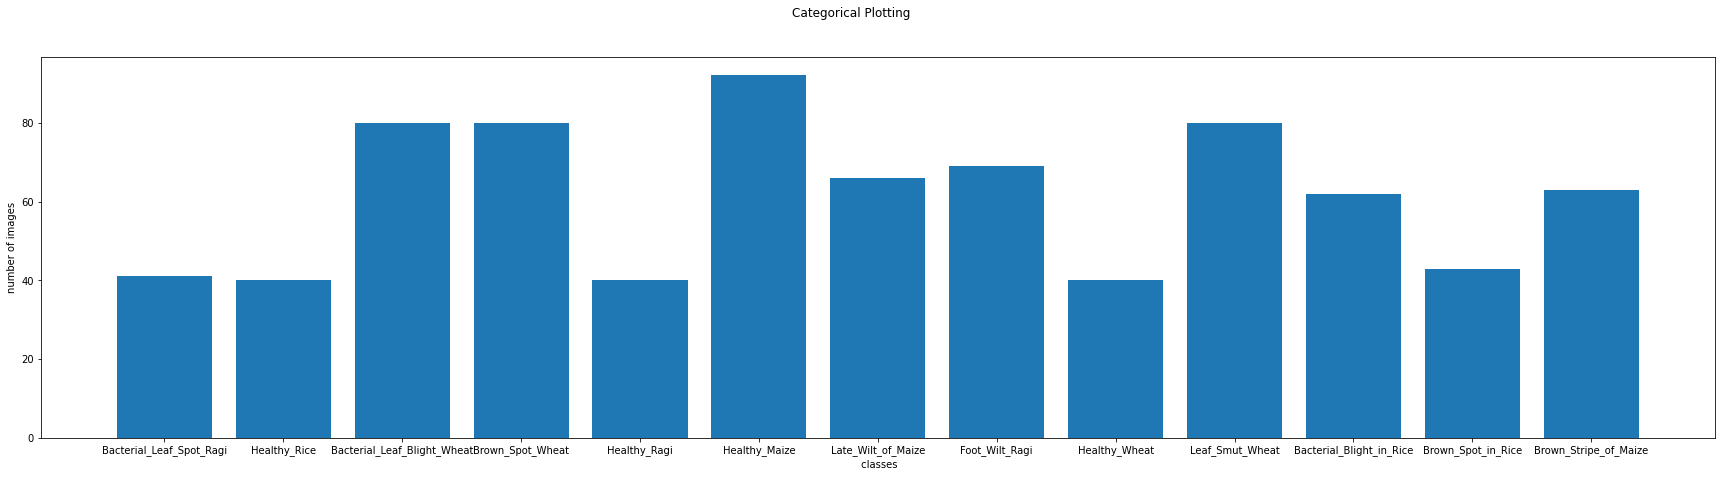

In [ ]:
values =[]
labels=[]
for label in set(classes):
  values.append(len(images[classes == label]))
  labels.append(label)

fig, ax = plt.subplots(figsize=(30,7))
ax.bar(labels, values)
ax.set_xlabel(" classes")
ax.set_ylabel("number of images")
#axs[1].scatter(label, )
  #axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')

In [ ]:
labels_id = {label_name:id for id,label_name in enumerate(labels)}
print("labels_id",labels_id)

#data_train['ClassName'].replace(labels_id,inplace=True)
with open(os.path.join(os.getcwd(),"drive/MyDrive/other","labels_list.pkl"),"wb") as handle:
    pickle.dump(labels_id,handle)

labels_id {'Bacterial_Leaf_Spot_Ragi': 0, 'Healthy_Rice': 1, 'Bacterial_Leaf_Blight_Wheat': 2, 'Brown_Spot_Wheat': 3, 'Healthy_Ragi': 4, 'Healthy_Maize': 5, 'Late_Wilt_of_Maize': 6, 'Foot_Wilt_Ragi': 7, 'Healthy_Wheat': 8, 'Leaf_Smut_Wheat': 9, 'Bacterial_Blight_in_Rice': 10, 'Brown_Spot_in_Rice': 11, 'Brown_Stripe_of_Maize': 12}


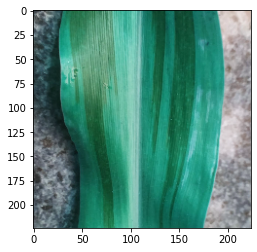

In [ ]:
plt.imshow(images[50])

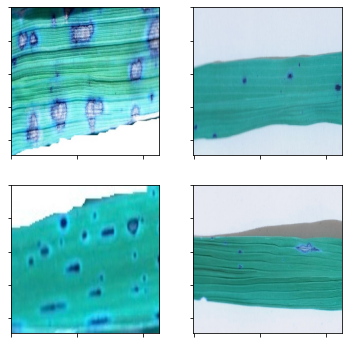

In [ ]:
def plot_for_class(label):
    nb_rows = 2
    nb_cols = 2
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=(6, 6))
    class_images =images[classes== label]
    n = 0
    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            axs[i, j].xaxis.set_ticklabels([])
            axs[i, j].yaxis.set_ticklabels([])
            axs[i, j].imshow(class_images[n])
            n += 1 
plot_for_class("Brown_Spot_Wheat")

In [ ]:
def sharpen_image(image):
    image_blurred = cv2.GaussianBlur(image, (0, 0), 3)
    image_sharp = cv2.addWeighted(image, 1.5, image_blurred, -0.5, 0)
    return image_sharp

In [ ]:
def segment(img):
  image_sharpen = sharpen_image(img)
  return image_sharpen

In [ ]:
for indx, image in enumerate(images):
  try:
     images[indx] = segment(image)
      
  except:
    print(indx)
    continue

In [ ]:
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y = enc.fit_transform(classes)

In [ ]:
LABELS = enc.classes_

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, y, test_size=0.3, random_state=21)

VGG19

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model
vgg19=VGG19(input_shape = IMAGE_SIZE , weights='imagenet', include_top=False)

80150528/80134624 [==============================] - 1s 0us/step


In [ ]:
x11= Flatten()(vgg19.output)
prediction11 = Dense(13, activation='softmax')(x11)
model11 = Model(inputs = vgg19.inputs, outputs = prediction11)
model11.summary()
model11.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
hist = model11.fit(X_train, y_train, epochs=20, validation_data=(X_test,y_test),callbacks=[callback])

Epoch 1/20
18/18 [==============================] - 32s 806ms/step - loss: 9.1956 - accuracy: 0.1023 - val_loss: 2.5251 - val_accuracy: 0.0879
Epoch 2/20
18/18 [==============================] - 9s 515ms/step - loss: 2.5528 - accuracy: 0.0952 - val_loss: 2.5178 - val_accuracy: 0.0921
Epoch 3/20
18/18 [==============================] - 9s 518ms/step - loss: 2.4746 - accuracy: 0.1221 - val_loss: 2.5075 - val_accuracy: 0.0837
Epoch 4/20
18/18 [==============================] - 9s 523ms/step - loss: 2.2199 - accuracy: 0.2208 - val_loss: 1.7948 - val_accuracy: 0.3724
Epoch 5/20
18/18 [==============================] - 9s 529ms/step - loss: 1.7394 - accuracy: 0.3950 - val_loss: 1.5583 - val_accuracy: 0.3891
Epoch 6/20
18/18 [==============================] - 10s 535ms/step - loss: 1.5613 - accuracy: 0.4111 - val_loss: 1.3999 - val_accuracy: 0.5105
Epoch 7/20
18/18 [==============================] - 10s 540ms/step - loss: 1.3374 - accuracy: 0.5135 - val_loss: 1.2891 - val_accuracy: 0.5188
Epo

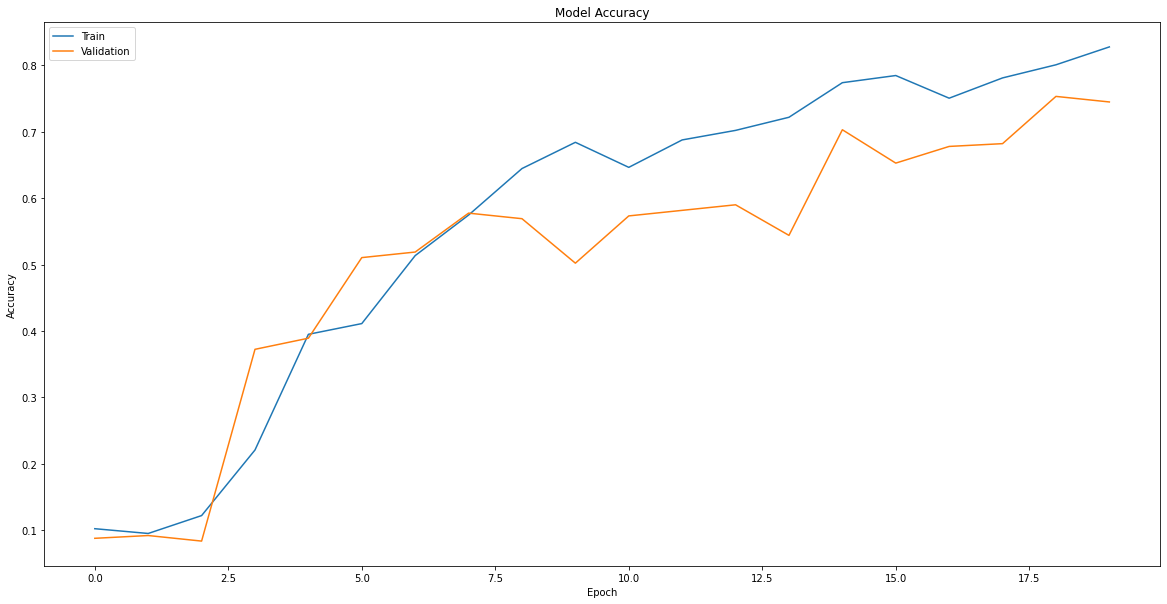

<Figure size 432x288 with 0 Axes>

In [ ]:
history = hist
from matplotlib import pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
plt.savefig('accuracy.png', dpi=100)

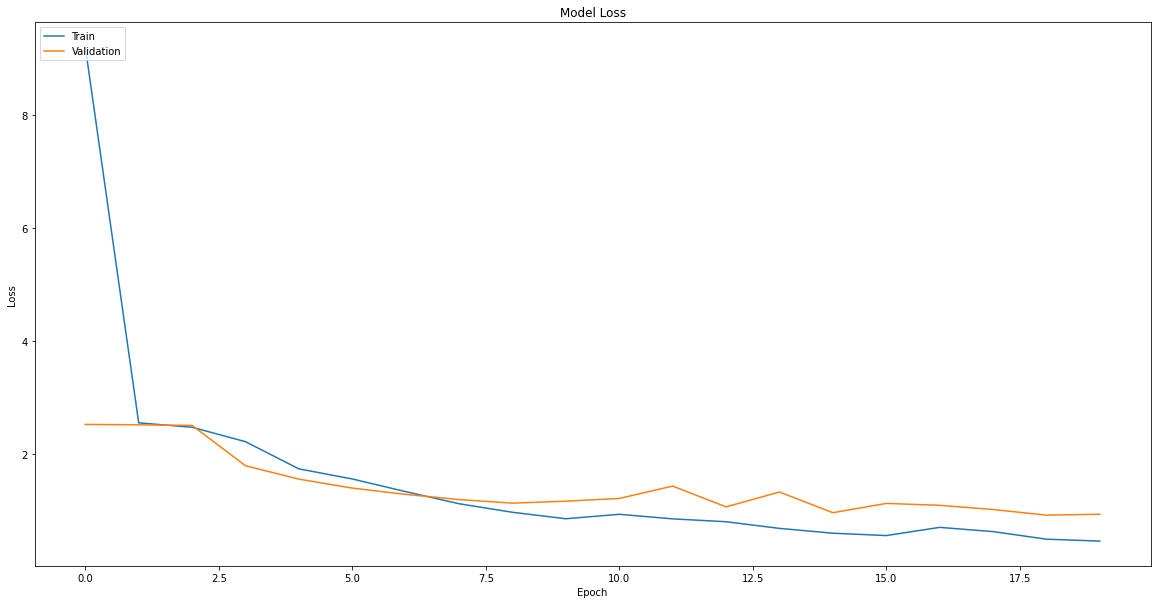

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
plt.savefig('loss.png', dpi=100)

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
# plt.subplots(figsize=(22,22)) #set the size of the plot 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(15,15))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.round(cm,3)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

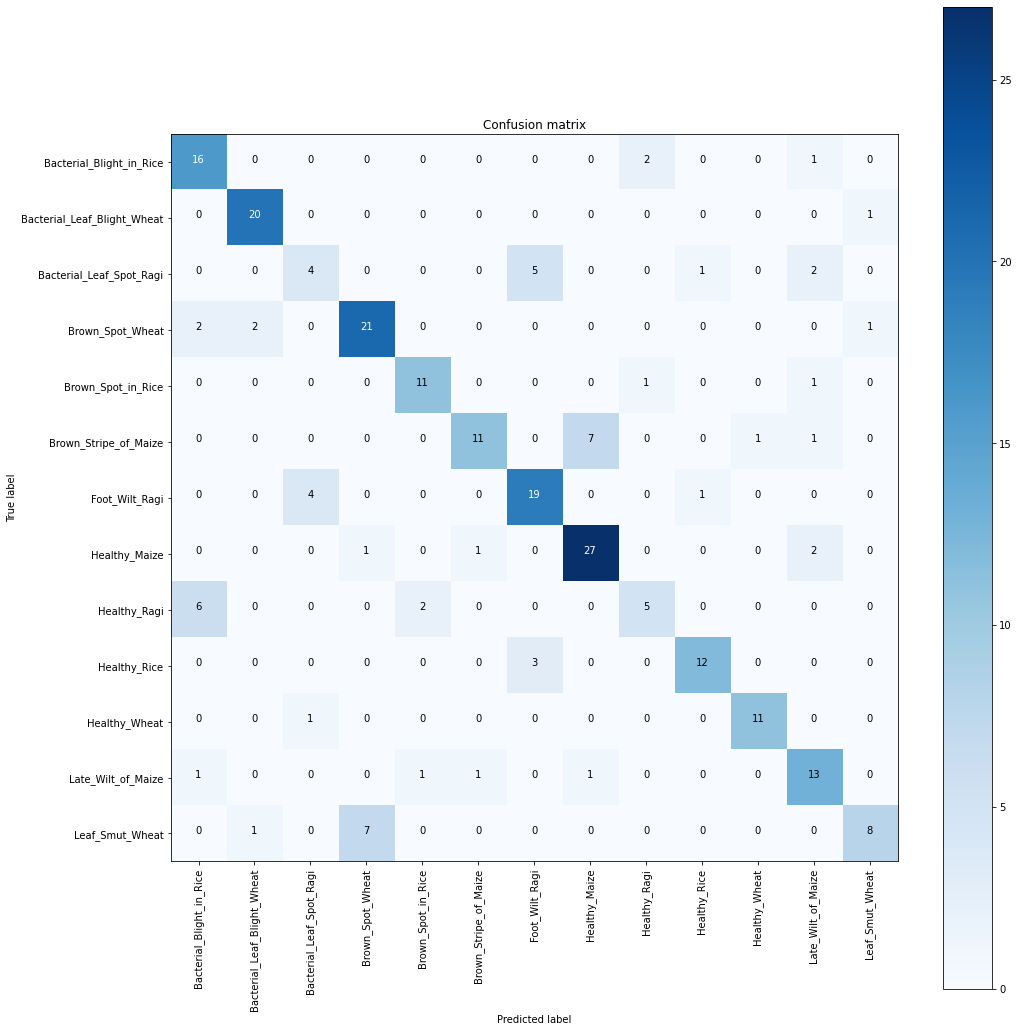

In [ ]:
# # Predict the values from the validation dataset
Y_pred = model11.predict(X_test)
# # Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# # Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# # compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# # plot the confusion matrix
plot_confusion_matrix(confusion_mtx,LABELS)

In [ ]:
true_classes = Y_true
class_labels = LABELS

#Model Report
report = metrics.classification_report(true_classes, Y_pred_classes, target_names=class_labels)
print(report) 

                             precision    recall  f1-score   support

   Bacterial_Blight_in_Rice       0.64      0.84      0.73        19
Bacterial_Leaf_Blight_Wheat       0.87      0.95      0.91        21
   Bacterial_Leaf_Spot_Ragi       0.44      0.33      0.38        12
           Brown_Spot_Wheat       0.72      0.81      0.76        26
         Brown_Spot_in_Rice       0.79      0.85      0.81        13
      Brown_Stripe_of_Maize       0.85      0.55      0.67        20
             Foot_Wilt_Ragi       0.70      0.79      0.75        24
              Healthy_Maize       0.77      0.87      0.82        31
               Healthy_Ragi       0.62      0.38      0.48        13
               Healthy_Rice       0.86      0.80      0.83        15
              Healthy_Wheat       0.92      0.92      0.92        12
         Late_Wilt_of_Maize       0.65      0.76      0.70        17
            Leaf_Smut_Wheat       0.80      0.50      0.62        16

                   accuracy     

In [ ]:
print(f"precision score: {precision_score(true_classes,  Y_pred_classes , average='macro')}")
print(f"recall score: {recall_score(true_classes, Y_pred_classes , average='macro')}")
print(f"f1 score: {f1_score(true_classes,  Y_pred_classes , average='macro')}")

precision score: 0.7410736556677049
recall score: 0.7200221573042676
f1 score: 0.7203264913594137


Inception V3

In [ ]:
mob = InceptionV3(input_shape = IMAGE_SIZE , weights='imagenet', include_top=False)

87924736/87910968 [==============================] - 0s 0us/step


In [ ]:
x1= Flatten()(mob.output)
prediction1 = Dense(13, activation='softmax')(x1)
model12 = Model(inputs = mob.inputs, outputs = prediction1)
model12.summary()
model12.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                           

In [ ]:
r1 = model12.fit(X_train,y_train, epochs=50, validation_data=(X_test,y_test))


Epoch 1/50
18/18 [==============================] - 19s 533ms/step - loss: 3.7995 - accuracy: 0.2980 - val_loss: 103118.9609 - val_accuracy: 0.0628
Epoch 2/50
18/18 [==============================] - 5s 271ms/step - loss: 2.7862 - accuracy: 0.4291 - val_loss: 222768.1562 - val_accuracy: 0.0795
Epoch 3/50
18/18 [==============================] - 5s 273ms/step - loss: 1.6421 - accuracy: 0.5440 - val_loss: 25820.5625 - val_accuracy: 0.1130
Epoch 4/50
18/18 [==============================] - 5s 275ms/step - loss: 1.3796 - accuracy: 0.6032 - val_loss: 18404.1738 - val_accuracy: 0.1088
Epoch 5/50
18/18 [==============================] - 5s 276ms/step - loss: 2.2738 - accuracy: 0.7235 - val_loss: 10408662.0000 - val_accuracy: 0.0879
Epoch 6/50
18/18 [==============================] - 5s 276ms/step - loss: 1.3572 - accuracy: 0.7127 - val_loss: 287340.9688 - val_accuracy: 0.0879
Epoch 7/50
18/18 [==============================] - 5s 274ms/step - loss: 0.6103 - accuracy: 0.7720 - val_loss: 25147

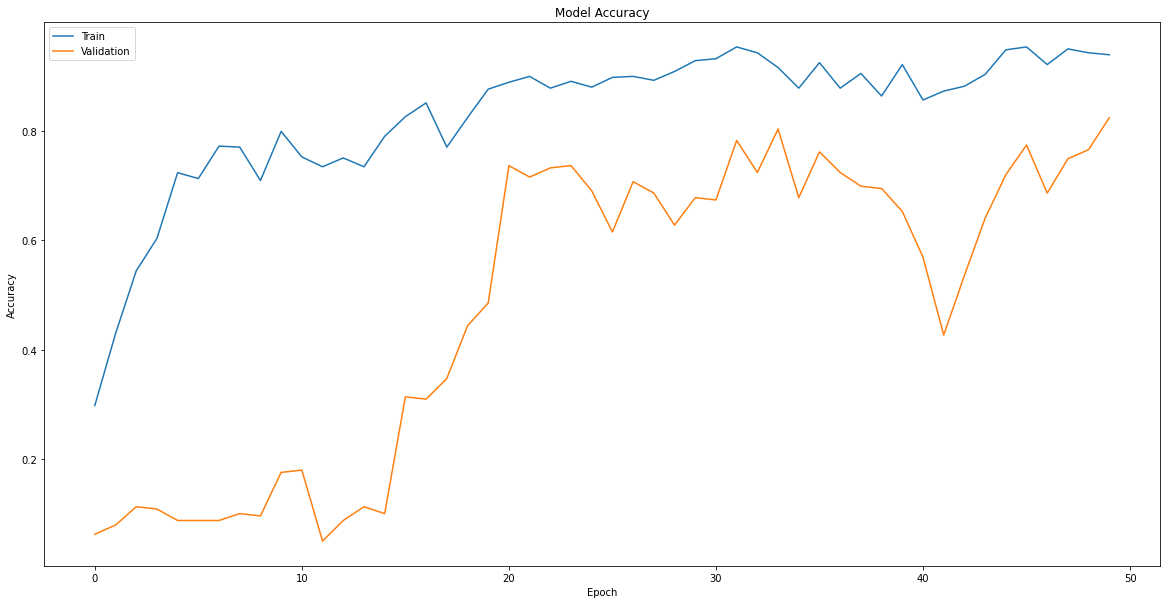

<Figure size 432x288 with 0 Axes>

In [ ]:
history = r1
from matplotlib import pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
plt.savefig('accuracy.png', dpi=100)

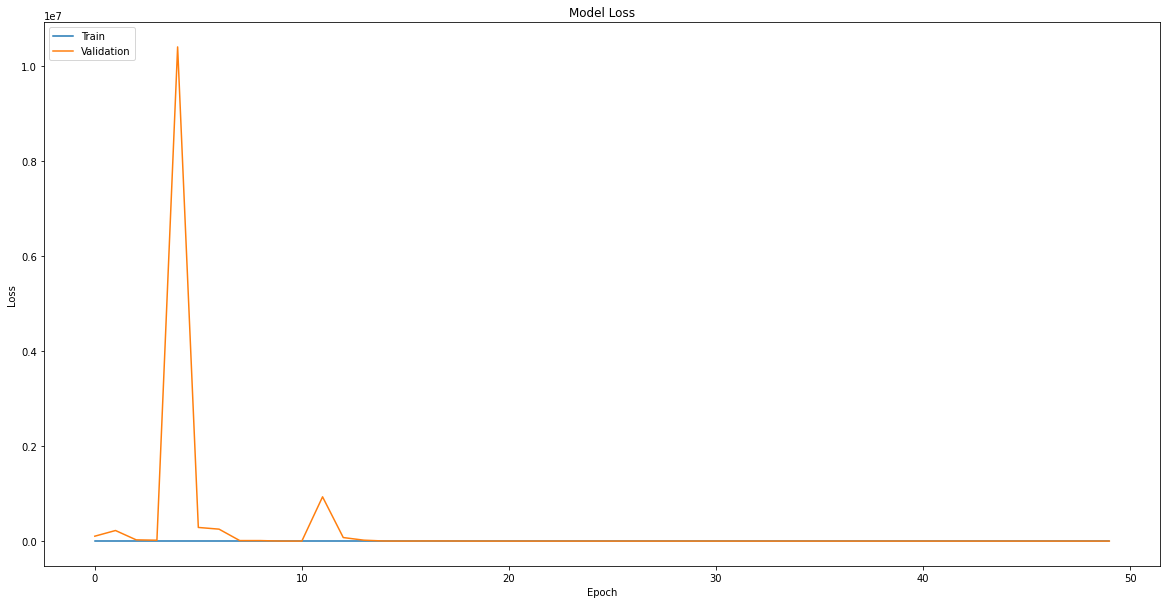

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
plt.savefig('loss.png', dpi=100)

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
# plt.subplots(figsize=(22,22)) #set the size of the plot 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(15,15))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.round(cm,3)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

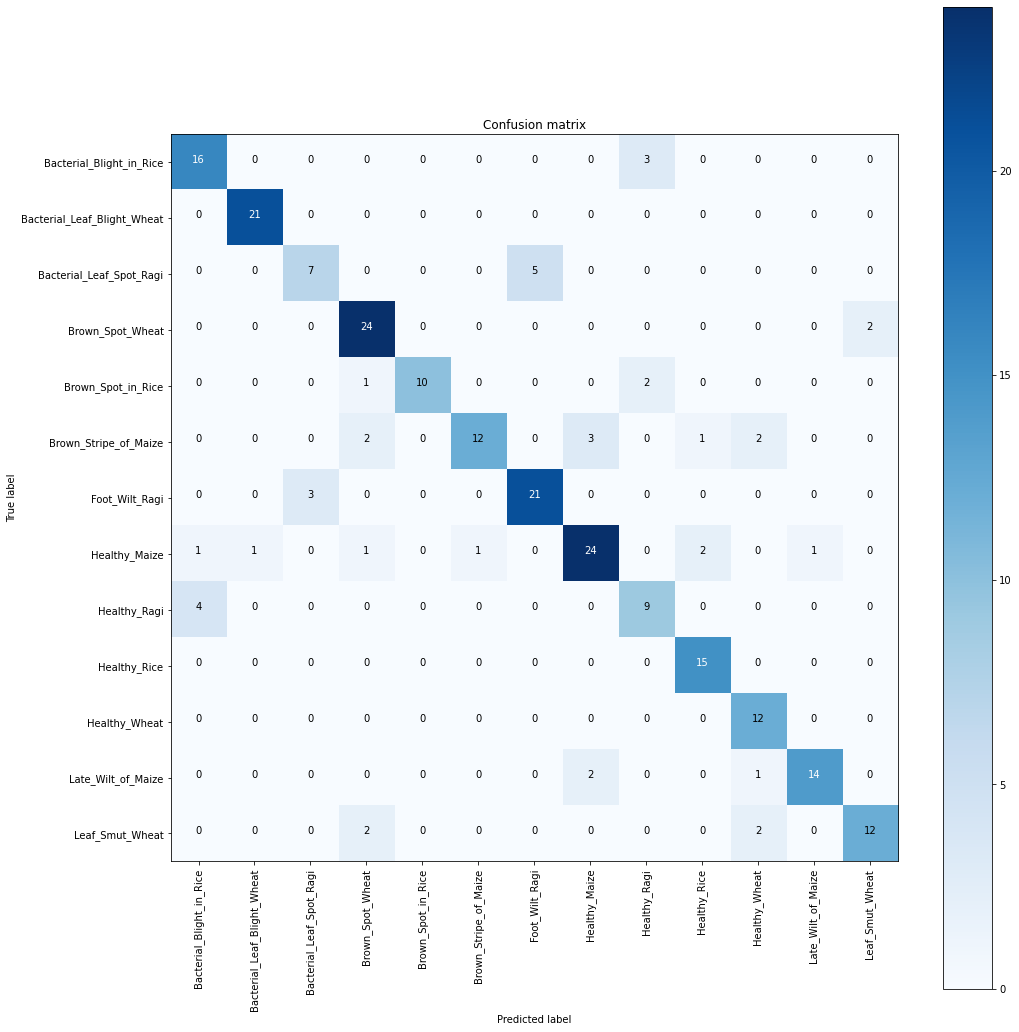

In [ ]:
# # Predict the values from the validation dataset
Y_pred = model12.predict(X_test)
# # Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# # Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# # compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# # plot the confusion matrix
plot_confusion_matrix(confusion_mtx,LABELS)

In [ ]:
true_classes = Y_true
class_labels = LABELS

#Model Report
report = metrics.classification_report(true_classes, Y_pred_classes, target_names=class_labels)
print(report) 

                             precision    recall  f1-score   support

   Bacterial_Blight_in_Rice       0.76      0.84      0.80        19
Bacterial_Leaf_Blight_Wheat       0.95      1.00      0.98        21
   Bacterial_Leaf_Spot_Ragi       0.70      0.58      0.64        12
           Brown_Spot_Wheat       0.80      0.92      0.86        26
         Brown_Spot_in_Rice       1.00      0.77      0.87        13
      Brown_Stripe_of_Maize       0.92      0.60      0.73        20
             Foot_Wilt_Ragi       0.81      0.88      0.84        24
              Healthy_Maize       0.83      0.77      0.80        31
               Healthy_Ragi       0.64      0.69      0.67        13
               Healthy_Rice       0.83      1.00      0.91        15
              Healthy_Wheat       0.71      1.00      0.83        12
         Late_Wilt_of_Maize       0.93      0.82      0.87        17
            Leaf_Smut_Wheat       0.86      0.75      0.80        16

                   accuracy     

In [ ]:
print(f"precision score: {precision_score(true_classes,  Y_pred_classes , average='macro')}")
print(f"recall score: {recall_score(true_classes, Y_pred_classes , average='macro')}")
print(f"f1 score: {f1_score(true_classes,  Y_pred_classes , average='macro')}")

precision score: 0.8267195902864495
recall score: 0.8179059185583397
f1 score: 0.8142640312977819


Inception Resnet V2

In [ ]:
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
from tensorflow.keras.models import Model
inc=InceptionResNetV2(input_shape = IMAGE_SIZE , weights='imagenet', include_top=False)

219070464/219055592 [==============================] - 1s 0us/step


In [ ]:
x31 = Flatten()(inc.output)
predictionss = Dense(13, activation='softmax')(x31)

In [ ]:
modelss = Model(inputs = inc.inputs, outputs = predictionss)
modelss.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 111, 111, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 111, 111, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                           

In [ ]:
modelss.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
r2 = modelss.fit(X_train, y_train, epochs=50, validation_data=(X_test,y_test))
x=r2

Epoch 1/50
18/18 [==============================] - 32s 871ms/step - loss: 0.1078 - accuracy: 0.9731 - val_loss: 0.4920 - val_accuracy: 0.8661
Epoch 2/50
18/18 [==============================] - 11s 636ms/step - loss: 0.1617 - accuracy: 0.9623 - val_loss: 0.8538 - val_accuracy: 0.8410
Epoch 3/50
18/18 [==============================] - 12s 645ms/step - loss: 0.1012 - accuracy: 0.9659 - val_loss: 0.5979 - val_accuracy: 0.8828
Epoch 4/50
18/18 [==============================] - 11s 640ms/step - loss: 0.0984 - accuracy: 0.9713 - val_loss: 2.1876 - val_accuracy: 0.7573
Epoch 5/50
18/18 [==============================] - 11s 632ms/step - loss: 0.0729 - accuracy: 0.9677 - val_loss: 0.8547 - val_accuracy: 0.8661
Epoch 6/50
18/18 [==============================] - 11s 627ms/step - loss: 0.0539 - accuracy: 0.9820 - val_loss: 0.6029 - val_accuracy: 0.8745
Epoch 7/50
18/18 [==============================] - 11s 624ms/step - loss: 0.0855 - accuracy: 0.9767 - val_loss: 0.9567 - val_accuracy: 0.8787

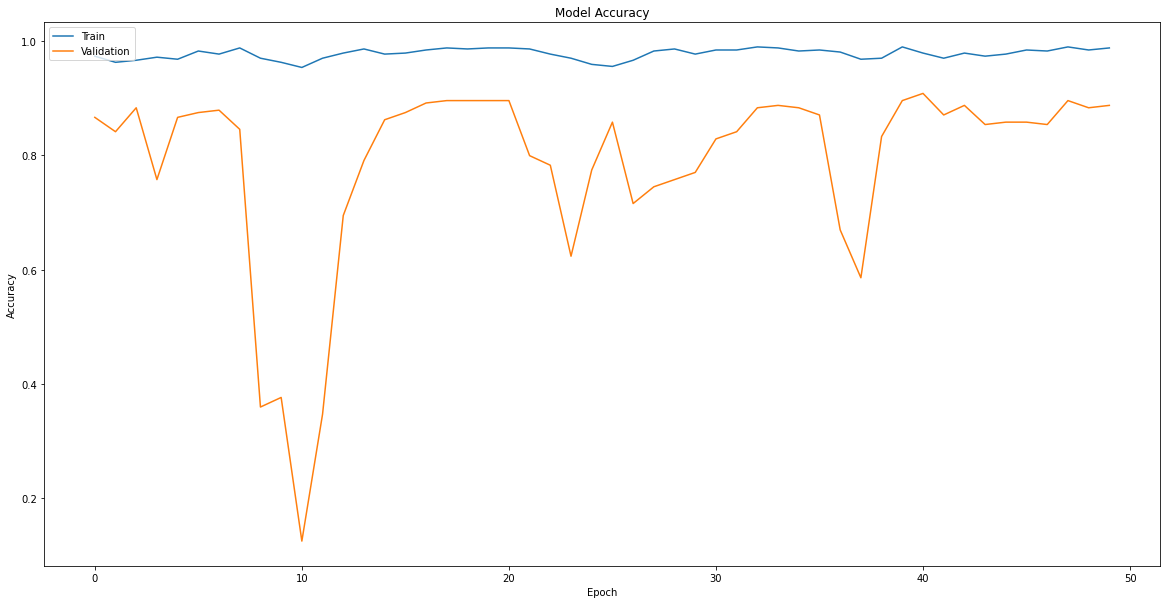

<Figure size 432x288 with 0 Axes>

In [ ]:
history = x
from matplotlib import pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
plt.savefig('accuracy.png', dpi=100)

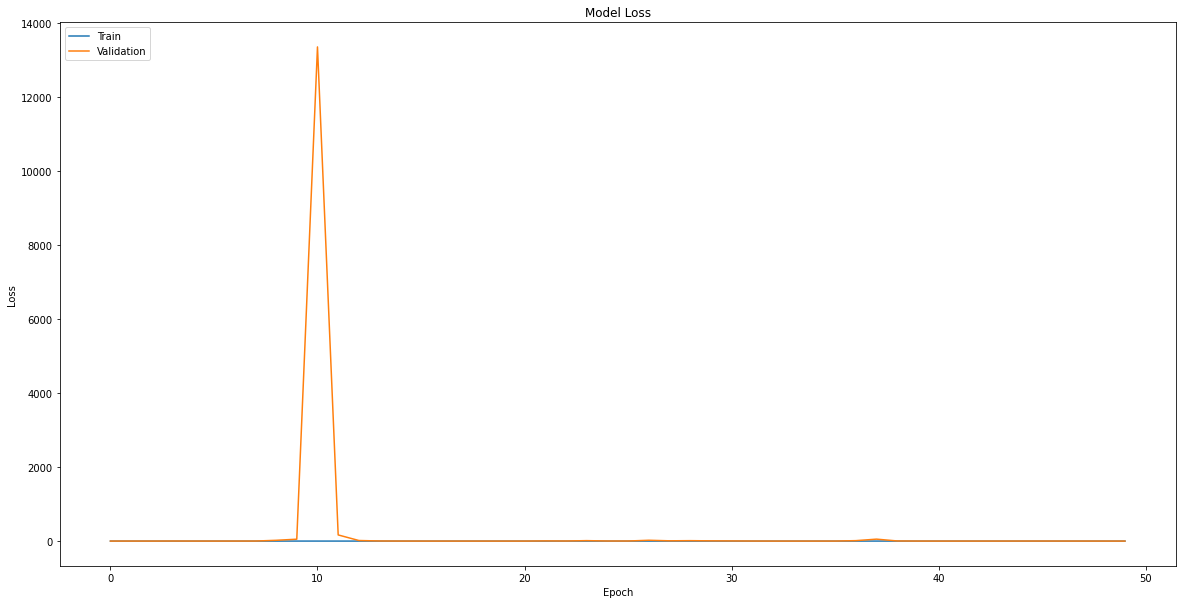

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
plt.savefig('loss.png', dpi=100)

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
# plt.subplots(figsize=(22,22)) #set the size of the plot 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(15,15))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.round(cm,3)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

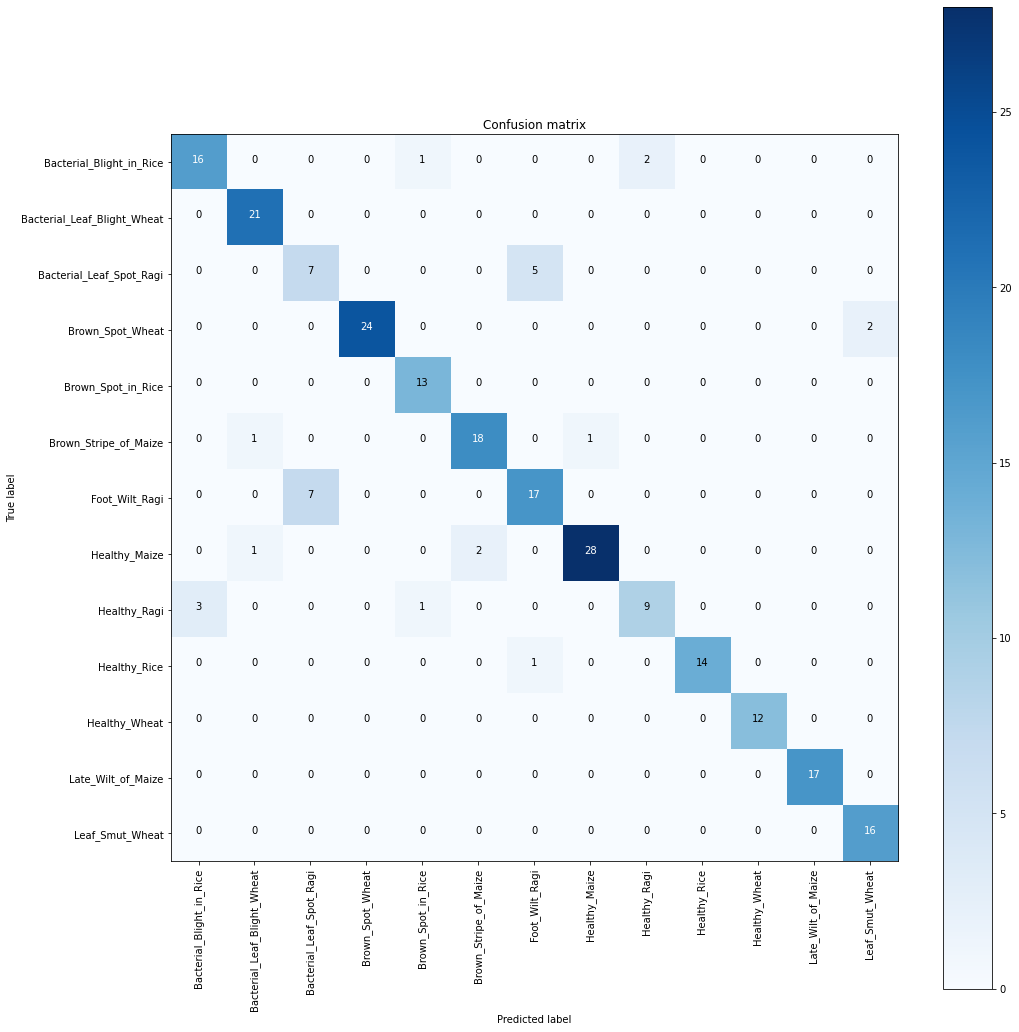

In [ ]:
# # Predict the values from the validation dataset
Y_pred = modelss.predict(X_test)
# # Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# # Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# # compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# # plot the confusion matrix
plot_confusion_matrix(confusion_mtx,LABELS)

In [ ]:
true_classes = Y_true
class_labels = LABELS

#Model Report
report = metrics.classification_report(true_classes, Y_pred_classes, target_names=class_labels)
print(report) 

                             precision    recall  f1-score   support

   Bacterial_Blight_in_Rice       0.84      0.84      0.84        19
Bacterial_Leaf_Blight_Wheat       0.91      1.00      0.95        21
   Bacterial_Leaf_Spot_Ragi       0.50      0.58      0.54        12
           Brown_Spot_Wheat       1.00      0.92      0.96        26
         Brown_Spot_in_Rice       0.87      1.00      0.93        13
      Brown_Stripe_of_Maize       0.90      0.90      0.90        20
             Foot_Wilt_Ragi       0.74      0.71      0.72        24
              Healthy_Maize       0.97      0.90      0.93        31
               Healthy_Ragi       0.82      0.69      0.75        13
               Healthy_Rice       1.00      0.93      0.97        15
              Healthy_Wheat       1.00      1.00      1.00        12
         Late_Wilt_of_Maize       1.00      1.00      1.00        17
            Leaf_Smut_Wheat       0.89      1.00      0.94        16

                   accuracy     

In [ ]:
print(f"precision score: {precision_score(true_classes,  Y_pred_classes , average='macro')}")
print(f"recall score: {recall_score(true_classes, Y_pred_classes , average='macro')}")
print(f"f1 score: {f1_score(true_classes,  Y_pred_classes , average='macro')}")

precision score: 0.8795025993321582
recall score: 0.8835165911533941
f1 score: 0.8797780757966419


saving the model


In [ ]:
modelss.save('/content/drive/MyDrive/data/model002.h5')